**Uploading the Data**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving peugeot_207_02.csv to peugeot_207_02.csv
Saving peugeot_207_01.csv to peugeot_207_01.csv
Saving opel_corsa_02.csv to opel_corsa_02.csv
Saving opel_corsa_01.csv to opel_corsa_01.csv


**Importing the Libraries**

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


**Loading the dataset using pandas**

In [18]:
# Loading each data with , as
corsa_journey_1 = pd.read_csv('opel_corsa_01.csv', sep=';')
corsa_journey_2 = pd.read_csv('opel_corsa_02.csv', sep=';')
peugeot_journey_1 = pd.read_csv('peugeot_207_01.csv', sep=';')
peugeot_journey_2 = pd.read_csv('peugeot_207_02.csv', sep=';')

# Define a function to create a traffic report for each journey
def create_traffic_report(data, vehicle_type, journey_number):
    # Add identifiers for vehicle type and journey
    data['Vehicle_Type'] = vehicle_type
    data['Journey'] = journey_number

    # Calculate class distribution for 'traffic' column in percentage
    if 'traffic' in data.columns:
        class_counts = data['traffic'].value_counts(normalize=True) * 100

        # Display the report
        print(f"Traffic Report for {vehicle_type}, Journey {journey_number}:")
        for traffic_class, percentage in class_counts.items():
            print(f"{traffic_class}: {percentage:.2f}%")
        print("\n" + "-"*40 + "\n")
    else:
        print(f"No 'traffic' column found in data for {vehicle_type}, Journey {journey_number}.")

# Generate traffic reports for each journey
create_traffic_report(corsa_journey_1, 'Opel Corsa', 1)
create_traffic_report(corsa_journey_2, 'Opel Corsa', 2)
create_traffic_report(peugeot_journey_1, 'Peugeot 207', 1)
create_traffic_report(peugeot_journey_2, 'Peugeot 207', 2)


Traffic Report for Opel Corsa, Journey 1:
LowCongestionCondition: 91.80%
HighCongestionCondition: 6.38%
NormalCongestionCondition: 1.82%

----------------------------------------

Traffic Report for Opel Corsa, Journey 2:
LowCongestionCondition: 87.76%
NormalCongestionCondition: 9.90%
HighCongestionCondition: 2.35%

----------------------------------------

Traffic Report for Peugeot 207, Journey 1:
LowCongestionCondition: 83.47%
NormalCongestionCondition: 8.49%
HighCongestionCondition: 8.04%

----------------------------------------

Traffic Report for Peugeot 207, Journey 2:
HighCongestionCondition: 40.78%
NormalCongestionCondition: 39.70%
LowCongestionCondition: 19.52%

----------------------------------------



**Add car type and journey number to the data**

In [19]:
# Adding identifiers for vehicle type and journey
corsa_journey_1['Vehicle_Type'] = 'Opel Corsa'
corsa_journey_1['Journey'] = 1
corsa_journey_2['Vehicle_Type'] = 'Opel Corsa'
corsa_journey_2['Journey'] = 2
peugeot_journey_1['Vehicle_Type'] = 'Peugeot 207'
peugeot_journey_1['Journey'] = 1
peugeot_journey_2['Vehicle_Type'] = 'Peugeot 207'
peugeot_journey_2['Journey'] = 2


# Checking if the columns are the same
set(corsa_journey_1.columns) == set(corsa_journey_2.columns) == set(peugeot_journey_1.columns) == set(peugeot_journey_2.columns)


True

**Concatenating, Encoding the data and plotting the histograms**

<class 'pandas.core.frame.DataFrame'>
Index: 23762 entries, 0 to 23774
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SampleNumber                 23762 non-null  int64  
 1   AltitudeVariation            23762 non-null  float64
 2   VehicleSpeedInstantaneous    23762 non-null  float64
 3   VehicleSpeedAverage          23762 non-null  float64
 4   VehicleSpeedVariance         23762 non-null  float64
 5   VehicleSpeedVariation        23762 non-null  float64
 6   LongitudinalAcceleration     23762 non-null  float64
 7   EngineLoad                   23762 non-null  float64
 8   EngineCoolantTemperature     23762 non-null  float64
 9   ManifoldAbsolutePressure     23762 non-null  float64
 10  EngineRPM                    23762 non-null  float64
 11  MassAirFlow                  23762 non-null  float64
 12  IntakeAirTemperature         23762 non-null  float64
 13  VerticalAcceleration 

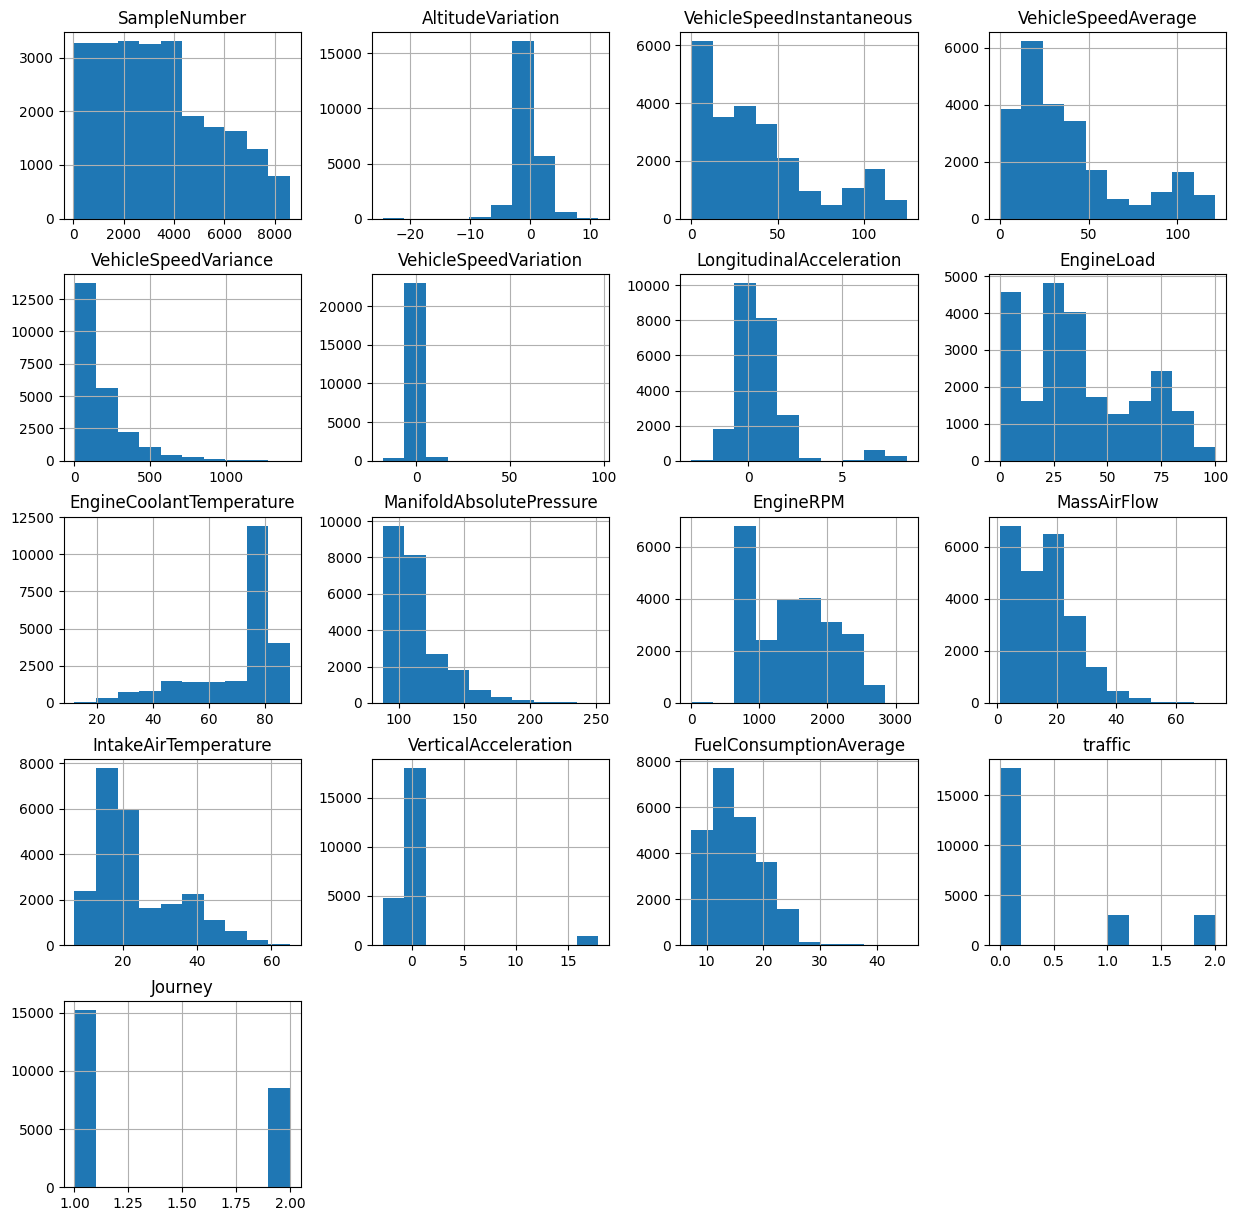

In [20]:
#Concatenating the data
data = pd.concat([corsa_journey_1, corsa_journey_2, peugeot_journey_1, peugeot_journey_2], ignore_index=True)
data = data.dropna()

# One hot encoding for Vehicle Type, driving style, and road surface
data = pd.get_dummies(data, columns=['Vehicle_Type','drivingStyle','roadSurface'], drop_first=True)
data['traffic'] = data['traffic'].map({'LowCongestionCondition': 0, 'NormalCongestionCondition': 1, 'HighCongestionCondition': 2})
data = data.rename(columns={'Unnamed: 0': 'SampleNumber'})

print(data.info())

# Plotting histograms for each feature
data.hist(figsize=(15, 15))
plt.show()

**Check for class balance**

In [21]:
# Calculating class distribution
class_counts = data['traffic'].value_counts(normalize=True) * 100
print(class_counts)

traffic
0    74.728558
2    12.688326
1    12.583116
Name: proportion, dtype: float64


**Check feature correlation**

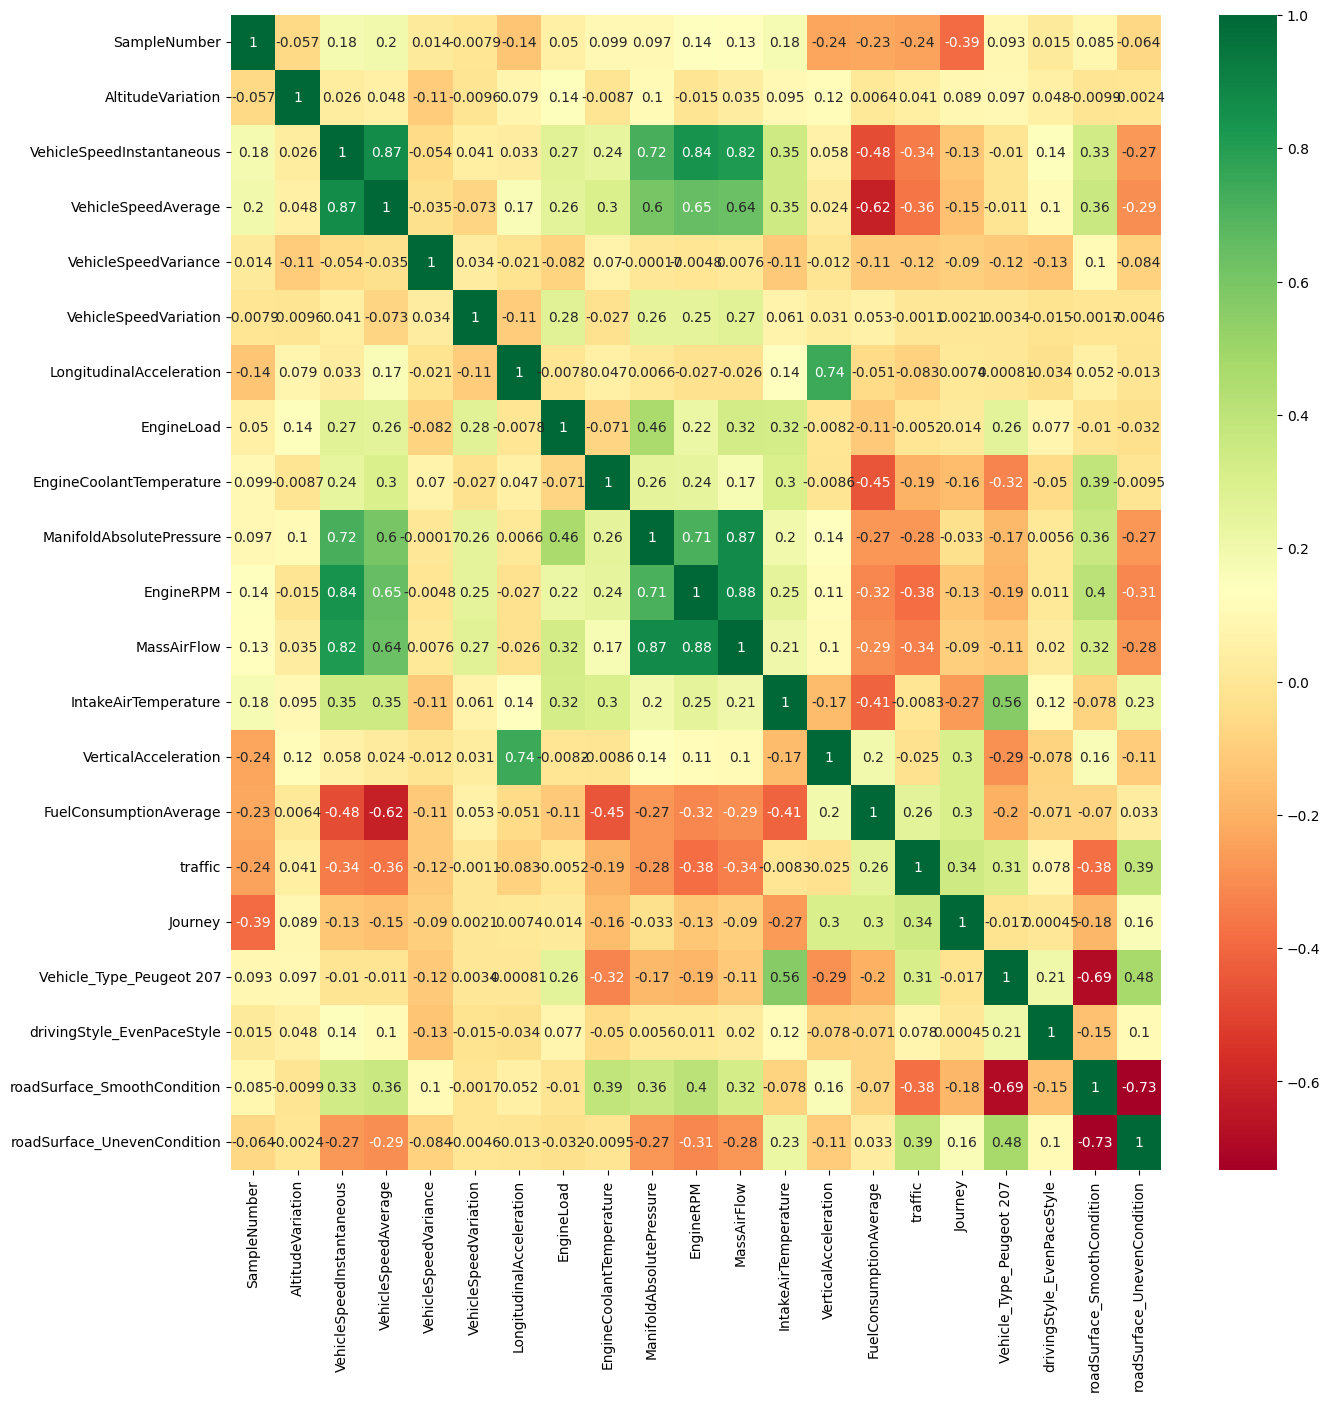

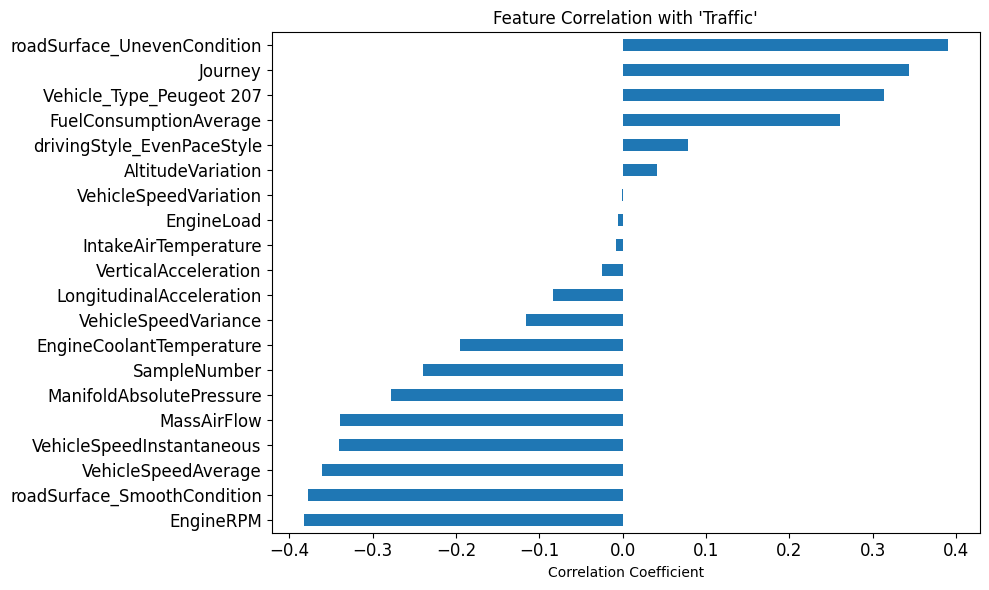

In [22]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", annot_kws={"size":10})

traffic_correlations = corr_matrix['traffic'].drop('traffic')  # Remove self-correlation

# Plot the correlations with 'traffic'
plt.figure(figsize=(10, 6))
traffic_correlations.sort_values().plot(kind='barh')
plt.title("Feature Correlation with 'Traffic'")
plt.xlabel("Correlation Coefficient")
# Increase font size for tick labels on both axes
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.tight_layout()


plt.savefig("feature_correlation_with_traffic.eps", format='eps')
plt.show()



**Selecting only Important feat based on corr**

In [23]:
# Set a threshold for absolute correlation
correlation_threshold = 0.05

# Get the absolute correlations with the target 'traffic'
target_correlations = corr_matrix['traffic'].abs()

# Identify features with correlation below the threshold (excluding the target itself)
low_correlation_features = target_correlations[target_correlations < correlation_threshold].index

# Drop low-correlation features from the DataFrame
data_filtered = data.drop(columns=low_correlation_features)

# Print the features that were dropped
print("Features dropped due to low correlation:", list(low_correlation_features))
print("Remaining features:", data_filtered.columns)


Features dropped due to low correlation: ['AltitudeVariation', 'VehicleSpeedVariation', 'EngineLoad', 'IntakeAirTemperature', 'VerticalAcceleration']
Remaining features: Index(['SampleNumber', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
       'VehicleSpeedVariance', 'LongitudinalAcceleration',
       'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM',
       'MassAirFlow', 'FuelConsumptionAverage', 'traffic', 'Journey',
       'Vehicle_Type_Peugeot 207', 'drivingStyle_EvenPaceStyle',
       'roadSurface_SmoothCondition', 'roadSurface_UnevenCondition'],
      dtype='object')


**Train - Test Split**

In [24]:
y = data['traffic']
x = data.drop(columns=['traffic'])
#x = x_selected
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=26)
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (19009, 20) (19009,)
Test set: (4753, 20) (4753,)


**Scale data**

In [25]:
# Scale the previous x and y data using minmaxscaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Model training**

**Logistic regression**

In [26]:
logregModel = LogisticRegression(max_iter=10000)
logregModel.fit(x_train, y_train) # Train Logistic Regression


y_pred_logistic = logregModel.predict(x_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1 Score: {f1_logistic}")

Logistic Regression Results:
Accuracy: 0.8647170208289502
Precision: 0.8563237640843838
Recall: 0.8647170208289502
F1 Score: 0.8544457151811302


**Confusion Matrix for Logistic regression**

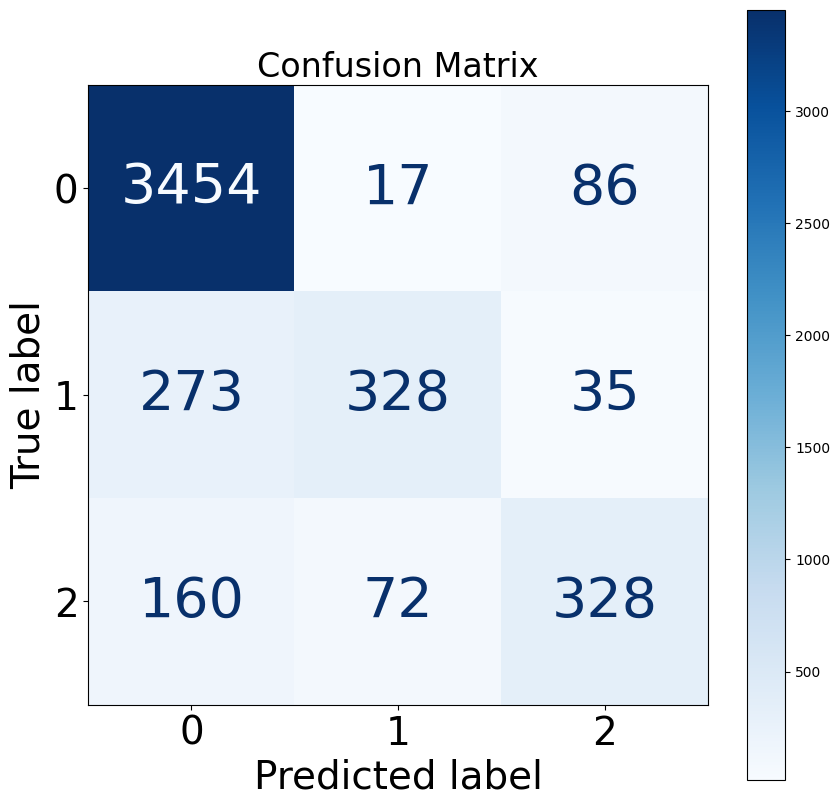

Classification Report:
                   precision    recall  f1-score   support

   Low Congestion       0.89      0.97      0.93      3557
Medium Congestion       0.79      0.52      0.62       636
  High Congestion       0.73      0.59      0.65       560

         accuracy                           0.86      4753
        macro avg       0.80      0.69      0.73      4753
     weighted avg       0.86      0.86      0.85      4753



In [33]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logregModel.classes_)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues')

# Adjust font sizes and labels
ax.set_title('Confusion Matrix', fontsize=24)  # Title font size
ax.set_xlabel('Predicted label', fontsize=28)   # X-axis label font size
ax.set_ylabel('True label', fontsize=28)        # Y-axis label font size
ax.tick_params(axis='both', which='major', labelsize=28)  # Tick label font size

# Adjust text font size within the matrix
for text_array in disp.text_:
    for text in text_array:
        text.set_fontsize(40)  # Font size for the values within the matrix

plt.savefig("confusion_matrix.eps", format='eps')
plt.show()

from sklearn.metrics import classification_report

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, target_names=["Low Congestion", "Medium Congestion", "High Congestion"]))

**SVM**

In [34]:
svmModel = SVC(kernel='poly', degree=6)
svmModel.fit(x_train, y_train) # Train SVM

y_pred_svm = svmModel.predict(x_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Precision, Recall, and F1-Score
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("SVM Results:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}\n")


SVM Results:
Accuracy: 0.9802230170418683
Precision: 0.9802000657021726
Recall: 0.9802230170418683
F1 Score: 0.9800784219964443



In [35]:
# Define the range of degrees for the polynomial kernel
degrees = [2, 3, 4, 5, 6]
kernels = ['poly', 'rbf', 'linear']

# Dictionary to store results
results = []

# Loop through each kernel and degree combination
for kernel in kernels:
    if kernel == 'poly':
        for degree in degrees:
            svmModel = SVC(kernel=kernel, degree=degree)
            svmModel.fit(x_train, y_train) # Train SVM

            # Predictions and evaluation
            y_pred_svm = svmModel.predict(x_test)
            accuracy_svm = accuracy_score(y_test, y_pred_svm)
            precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
            recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
            f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

            # Store results
            results.append({
                'Kernel': kernel,
                'Degree': degree,
                'Accuracy': accuracy_svm,
                'Precision': precision_svm,
                'Recall': recall_svm,
                'F1 Score': f1_svm
            })
    else:
        # For 'rbf' and 'linear' kernels, degree is not applicable
        svmModel = SVC(kernel=kernel)
        svmModel.fit(x_train, y_train) # Train SVM

        # Predictions and evaluation
        y_pred_svm = svmModel.predict(x_test)
        accuracy_svm = accuracy_score(y_test, y_pred_svm)
        precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
        recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
        f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

        # Store results
        results.append({
            'Kernel': kernel,
            'Degree': 'N/A',
            'Accuracy': accuracy_svm,
            'Precision': precision_svm,
            'Recall': recall_svm,
            'F1 Score': f1_svm
        })

# Print results
print("SVM Model Comparison Results:")
for res in results:
    print(f"Kernel: {res['Kernel']}, Degree: {res['Degree']}")
    print(f"Accuracy: {res['Accuracy']}")
    print(f"Precision: {res['Precision']}")
    print(f"Recall: {res['Recall']}")
    print(f"F1 Score: {res['F1 Score']}\n")


SVM Model Comparison Results:
Kernel: poly, Degree: 2
Accuracy: 0.9141594782242795
Precision: 0.9113580771391102
Recall: 0.9141594782242795
F1 Score: 0.9084189250555013

Kernel: poly, Degree: 3
Accuracy: 0.9391962970755312
Precision: 0.9376410865389041
Recall: 0.9391962970755312
F1 Score: 0.936869910615179

Kernel: poly, Degree: 4
Accuracy: 0.9587628865979382
Precision: 0.957981632930255
Recall: 0.9587628865979382
F1 Score: 0.9578746372614713

Kernel: poly, Degree: 5
Accuracy: 0.9722280664843257
Precision: 0.972042373333938
Recall: 0.9722280664843257
F1 Score: 0.9719118995127676

Kernel: poly, Degree: 6
Accuracy: 0.9802230170418683
Precision: 0.9802000657021726
Recall: 0.9802230170418683
F1 Score: 0.9800784219964443

Kernel: rbf, Degree: N/A
Accuracy: 0.9187881338102252
Precision: 0.9158053116869961
Recall: 0.9187881338102252
F1 Score: 0.9139287285221954

Kernel: linear, Degree: N/A
Accuracy: 0.8687144961077214
Precision: 0.8617031677191086
Recall: 0.8687144961077214
F1 Score: 0.853369

In [36]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_model = HistGradientBoostingClassifier()  # Histogram Gradient Boosting
# Train Histogram Gradient Boosting Classifier
hgb_model.fit(x_train, y_train)

y_pred_hgb = hgb_model.predict(x_test)

# Histogram Gradient Boosting Evaluation
accuracy_hgb = accuracy_score(y_test, y_pred_hgb)
precision_hgb = precision_score(y_test, y_pred_hgb, average='weighted')
recall_hgb = recall_score(y_test, y_pred_hgb, average='weighted')
f1_hgb = f1_score(y_test, y_pred_hgb, average='weighted')

print("Histogram Gradient Boosting Results:")
print(f"Accuracy: {accuracy_hgb}")
print(f"Precision: {precision_hgb}")
print(f"Recall: {recall_hgb}")
print(f"F1 Score: {f1_hgb}")


Histogram Gradient Boosting Results:
Accuracy: 0.9985272459499264
Precision: 0.9985369151594304
Recall: 0.9985272459499264
F1 Score: 0.9985295309027961
